<a href="https://colab.research.google.com/github/gustavofelicidade/classificador_cats_vs_dogs/blob/main/classificador_cats_vs_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lista 5
### NCG-040 - Introdução à Visão Computacional

**Instruções:**

 1. Comentários nos códigos desenvolvidos.
 1. Caso exista uma pergunta, deve ser respondida como comentários no arquivo ou em uma nova célula de texto.
 1. Digitar seu nome e DRE abaixo.
 1. Ao finalizarem a lista, renomeie ou salve uma cópia do arquivo no formato NomeSobrenome_ListaX.ipynb
 1. Enviar via Dropbox até 12/10/2021 - https://www.dropbox.com/request/BHSy3XhiLxmLF1tq45a7

`Nome: ` Gustavo Felicidade

`DRE: ` 118171109

### 0) Instruções

Para esta lista, vamos fazer algo um pouco diferente. Vocês estão livres para escolher um dataset simples e fazer um treinamento de rede neural, conforme visto nas aulas do dia 15, 17 e 22 de Setembro. No mínimo uma tarefa de classificação binária.

Dica: Cats vs Dogs do Kaggle ou similar

# **Importando Bibliotecas**

In [1]:
# OBS:. Não utilizei a GPU do colaboratory -> Sem memória para compilar a rede neural.
!conda install -c anaconda tensorflow-datasets # Rodar no Jupyter ->  para baixar o dataset no ambiente Anaconda.
!pip install tensorflow-datasets               # Rodar no Colab   ->  para baixar o dataset no Google Colaboratory.
!pip install -q tf-nightly                    

import tensorflow_datasets as tfds
import tensorflow as tf

tf.__version__, tf.test.gpu_device_name()    # Verificar versão do Tensorflow e disponibilidade da GPU. 


/bin/bash: conda: command not found
     |████████████████████████████████| 490.3 MB 35 kB/s 
     |████████████████████████████████| 13.4 MB 252 kB/s 
     |████████████████████████████████| 5.8 MB 35.6 MB/s 
     |████████████████████████████████| 462 kB 90.3 MB/s 
     |████████████████████████████████| 1.3 MB 65.4 MB/s 
     |████████████████████████████████| 2.1 MB 32.6 MB/s 


('2.8.0-dev20211009', '')

In [2]:
#Suprimir Warnings 
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Verificando versão do Tensorflow**

In [4]:
# verify TensorFlow version

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")


Version:  2.8.0-dev20211009
Eager mode:  True
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU is NOT AVAILABLE


# **Construindo o dataset**

In [6]:
# Construindo um tf.data.Dataset
ds, info = tfds.load('cats_vs_dogs', split='train', with_info=True, try_gcs=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incompleteWIR2SD/cats_vs_dogs-train.tfrecord


  0%|          | 0/23262 [00:00<?, ? examples/s]

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


**Metadata**

*Exibir o conteúdo do objeto info:*

In [7]:
info

tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    version=4.0.0,
    description='A large set of images of cats and dogs.There are 1738 corrupted images that are dropped.',
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'image/filename': Text(shape=(), dtype=tf.string),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    total_num_examples=23262,
    splits={
        'train': 23262,
    },
    supervised_keys=('image', 'label'),
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, John (JD) and Howell, Jon and Saul, Jared},
    title = {Asirra: A CAPTCHA that Exploits Interest-Aligned Manual Image Categorization},
    booktitle = {Proceedings of 14th ACM Conference on Computer and Communications Security (CCS)},
    ye


*Obtenha rótulos de classe e número de classes:*

In [8]:
class_labels = info.features['label'].names
num_classes = info.features['label'].num_classes
class_labels, num_classes

(['cat', 'dog'], 2)

*Exibir informações de divisão:*

In [9]:
num_train_img = info.splits['train[0%:80%]'].num_examples
num_validation_img = info.splits['train[80%:90%]'].num_examples
num_test_img = info.splits['train[90%:100%]'].num_examples
print ('train images:', num_train_img)
print ('validation images:', num_validation_img)
print ('test images:', num_test_img)

train images: 18610
validation images: 2326
test images: 2326


*Verifique as porcentagens de divisão:*

In [10]:
train_num = num_train_img /23262
validation_num = num_validation_img /23262
test_num = num_test_img /23262
'{0:.0%}'.format(train_num), '{0:.0%}'.format(validation_num),\
'{0:.0%}'.format(test_num)

('80%', '10%', '10%')

**Divida os dados**

In [11]:
(training_set, validation_set, test_set), info = tfds.load(
 'cats_vs_dogs', with_info=True,
 split=['train[:80%]', 'train[80%:90%]',
 'train[90%:]'], shuffle_files=True,
 as_supervised=True, try_gcs=True)

*Verifique manualmente o número de exemplos em cada divisão:*

In [12]:
len(list(training_set)), len(list(validation_set)),\
len(list(test_set))

(18610, 2326, 2326)

**Visualize**

*Exibir exemplos com show_examples:*

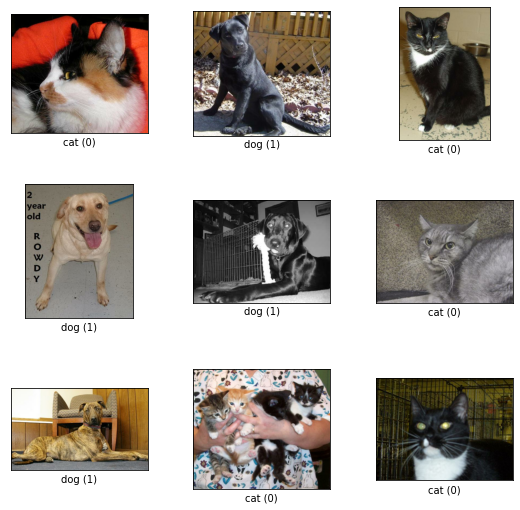

In [13]:
fig = tfds.show_examples(training_set, info)

*Exemplos de exibição como um dataframe:*

,image,label
0,,0 (cat)
1,,1 (dog)
2,,0 (cat)
3,,1 (dog)

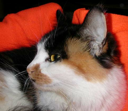
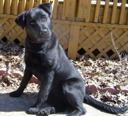
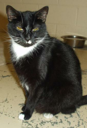
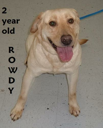

In [14]:
tfds.as_dataframe(training_set.take(4), info)

*Para máximo controle, exiba manualmente os exemplos. Comece dando alguns exemplos:*

In [15]:
images, labels = [], []
for img, lbl in training_set.take(4):
 img = tf.squeeze(img)
 images.append(img), labels.append(lbl)

*Visualize exemplos*

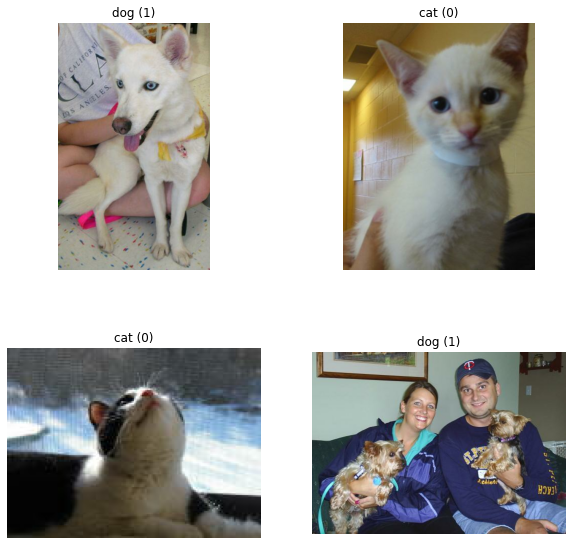

In [16]:
rows, cols = 2, 2
plt.figure(figsize=(10, 10))
for i in range(rows*cols):
 plt.subplot(rows, cols, i + 1)
 plt.imshow(images[i], cmap='bone')
 t = class_labels[labels[i]] + ' (' +\
 str(labels[i].numpy()) + ')'
 plt.title(t)
 plt.axis('off')
 

*Agora, temos uma ideia de como os exemplos se parecem no conjunto de dados*

**Exemplos de inspeção**

Pegue alguns exemplos e converta-os em matrizes NumPy

In [17]:
features, labels = [], []
for img, lbl in training_set.take(4):
 img = tfds.as_numpy(img)
 lbl = tfds.as_numpy(lbl)
 features.append(img)
 labels.append(lbl)

*Visualize exemplos inspecionados*

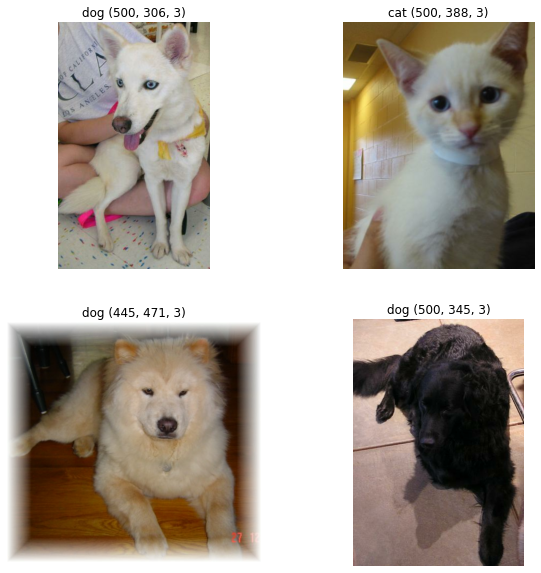

In [18]:
rows, cols = 2, 2
plt.figure(figsize=(10, 10))
for i in range(rows*cols):
 c = class_labels[labels[i]]
 s = str(features[i].shape)
 title = c + ' ' + s
 plt.subplot(rows, cols, i + 1)
 plt.title(title)
 plt.imshow(features[i], cmap='binary')
 plt.axis('off')

# **Redimensionar imagens**

*Crie uma função para redimensionar e dimensionar imagens:*

In [19]:
def format_image(image, label):
 image = tf.image.resize(image, (150, 150))/255.0
 return image, label

*É mais rápido treinar um modelo com imagens menores. Portanto, redimensione as imagens para 150 × 150 pixels. Dimensione as imagens para melhorar o desempenho do treinamento.*

**Construir o pipeline de entrada**

*O pipeline de entrada é construído preparando os conjuntos de treinamento, validação e teste para o modelo de aprendizagem. Defina os parâmetros de lote e ordem aleatória:*

In [20]:
BATCH_SIZE = 200
SHUFFLE_SIZE = 500

*Dica Experimente os tamanhos de lote e aleatório para ver como está o desempenho do aprendizado impactado.*

*Transforme os dados para um desempenho ideal:*

In [21]:
train_batches = training_set.shuffle(SHUFFLE_SIZE).\
map(format_image).batch(BATCH_SIZE).cache().prefetch(1)

validation_batches = validation_set.\
map(format_image).batch(BATCH_SIZE).cache().prefetch(1)

test_batches = test_set.\
map(format_image).batch(BATCH_SIZE).cache().prefetch(1)

*Por lote (batch), o tempo de treinamento é reduzido. Ao embaralhar, a precisão geralmente é aumentada. O armazenamento em cache ajuda a gerenciar melhor a memória e a pré-busca deve reduzir o tempo de treinamento.*

**Inspecione os tensores:**

In [22]:
train_batches, validation_batches, test_batches

(<PrefetchDataset shapes: ((None, 150, 150, 3), (None,)), types: (tf.float32, tf.int64)>,
 <PrefetchDataset shapes: ((None, 150, 150, 3), (None,)), types: (tf.float32, tf.int64)>,
 <PrefetchDataset shapes: ((None, 150, 150, 3), (None,)), types: (tf.float32, tf.int64)>)

**Visualize e inspecione exemplos de um lote**

*Faça o primeiro lote de treinamento*

In [23]:
for img, lbl in train_batches.take(1):
 print (img.shape)

(200, 150, 150, 3)


Inspecione o primeiro exemplo do lote:

In [24]:
img[0].shape, class_labels[lbl[0].numpy()]

(TensorShape([150, 150, 3]), 'cat')

*O exemplo contém uma imagem 150 × 150 × 3 de um "cachorro" ou um "gato". Não podemos saber qual por causa dos efeitos de randomização. Extraia quatro exemplos em listas*

In [25]:
images, labels = [], []
for i in range(4):
 tf.squeeze(img[i])
 images.append(img[i]), labels.append(lbl[i])

*Comprima a 1 dimensão porque a função imshow () espera uma matriz 2D*

Visualize exemplos em lote

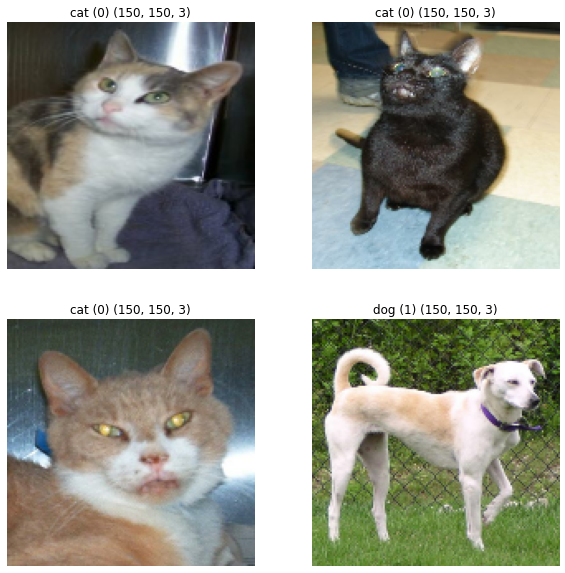

In [26]:
rows, cols = 2, 2
plt.figure(figsize=(10, 10))
for i in range(rows*cols):
 plt.subplot(rows, cols, i + 1)
 plt.imshow(images[i], cmap='bone')
 t = class_labels[labels[i]] + ' (' +\
 str(labels[i].numpy()) + ') ' +\
 str(images[i].shape)
 plt.title(t)
 plt.axis('off')

# **Construir o modelo**

*Obter forma de entrada:*

In [27]:
for img, lbl in train_batches.take(1):
 in_shape = img.shape[1:]
in_shape

TensorShape([150, 150, 3])

*Import libraries:*

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,\
Dense, Flatten, Dropout

Clear and seed:

In [29]:
tf.keras.backend.clear_session()
np.random.seed(0)
tf.random.set_seed(0)

**Multilayered CNN Model**

In [30]:
def build_model():
 model = \
 Sequential([
 Conv2D(32, (3, 3), activation = 'relu',
 input_shape=in_shape, strides=1,
 kernel_regularizer='l1_l2'),
 MaxPooling2D(2, 2),
 Conv2D(64, (3, 3), activation='relu'),
 MaxPooling2D(2, 2),
 Conv2D(128, (3, 3), activation='relu'),
 MaxPooling2D(2),
 Conv2D(128, (3, 3), activation='relu'),
 MaxPooling2D(2, 2),
 Flatten(),
 Dense(512, activation='relu'),
 Dense(num_classes, activation='sigmoid')])
 return model

Criamos uma função para conter o modelo para este experimento. Fazemos isso para te mostrar como isso pode ser feito com uma função.

O modelo começa com quatro camadas Conv2D e quatro MaxPooling2D associados
camadas. Uma camada Conv2D calcula uma convolução 2D dada a entrada e tensores de filtro 4D. 

No em nosso caso, as dimensões dos tensores são (200, 150, 150, 3). Os tensores de entrada são lotes de 200 150 × 150 imagens coloridas. 
Uma camada MaxPooling2D executa uma operação de pooling máximo para
Dados espaciais 2D.

 Portanto, cada operação de pooling máximo reduz a dimensionalidade do 2D
dados espaciais que recebe de cada camada Conv2D. Usamos um tamanho de pool de 2 × 2 porque nós teve um bom desempenho com este tamanho.

Camadas convolucionais aplicam filtros à imagem original ou a outros mapas de feições.

os parâmetros mais importantes são o número e o tamanho dos kernels. Desempenho de camadas de agrupamento pooling máximo ou pooling médio para reduzir a dimensionalidade da rede.

 Nós usamos um camada de pooling após cada camada convolucional para reduzir a dimensionalidade produzida por a camada convolucional. O pool máximo leva o valor máximo em uma região de filtro, enquanto o pooling médio leva o valor médio em uma região de filtro.

A primeira camada Conv2D aceita o número de kernels, tamanho do kernel, forma de entrada, avanços e regularização. Usamos um tamanho de kernel de 3 × 3 porque tivemos uma boa experiência desempenho com este tamanho. Adicionamos a regularização l1 e l2 para reduzir o sobreajuste. 

UMA kernel é um filtro usado para extrair recursos de imagens. Especificamente, um kernel é uma matriz que se move sobre os dados de entrada, realiza o produto escalar com a sub-região de entrada dados e obtém a saída como a matriz de produtos escalares (ou mapas de recursos). 

Um mapa de recursos captura o resultado da aplicação dos filtros (ou kernels) a uma imagem de entrada.

A razão para visualizar um mapa de recursos para uma imagem de entrada específica é tentar obter alguma compreensão de quais recursos nosso CNN detecta. Aplicamos vários convolucionais camadas aos dados porque esperamos que cada camada produza mapas de recursos que nos ajudem detectar recursos cada vez mais claros.

As camadas Conv2D restantes aumentam o tamanho do kernel para melhorar o modelo
atuação. Após cada camada Conv2D é um MaxPooling2D para reduzir a dimensionalidade contribuído por convolução. Cada camada Conv2D usa Unidade Linear Retificada (ReLU) ativação, que combate o problema de gradiente de desaparecimento que ocorre com sigmóide distribuições.

Uma camada Achatada prepara a saída das camadas convolucionais para as camadas Densa.

Camadas densas requerem um único vetor de longa característica como entrada. Dois Densos totalmente conectados camadas são incluídas para classificação da saída.


Crie o modelo:

In [31]:
cat_dog_model = build_model()

Inspecione o modelo:

In [32]:
cat_dog_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

# **Compilar e treinar o modelo**

*Compilar:*

In [33]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(
 from_logits=True)
cat_dog_model.compile(optimizer='adam',
 loss=loss,
 metrics=['accuracy'])

*Traine:*

In [34]:
epochs = 10
history = cat_dog_model.fit(
 train_batches, epochs=epochs,
 verbose=1,
 validation_data = validation_batches)

94/94 [==============================] - 603s 6s/step - loss: 1.1134 - accuracy: 0.5650 - val_loss: 0.8793 - val_accuracy: 0.6483


*O modelo aprende com o conjunto de treinamento e valida com o conjunto de validação. o modelo nunca toca o conjunto de teste.*

**Avalie o modelo para generalização**

Use o método de avaliação com o lote de teste:

In [35]:
metrics = cat_dog_model.evaluate(test_batches)

12/12 [==============================] - 22s 2s/step - loss: 0.8709 - accuracy: 0.6505


**Visualize Performance**

In [36]:
def viz(hd):
 acc = hd['accuracy']
 val_acc = hd['val_accuracy']
 loss = hd['loss']
 val_loss = hd['val_loss']
 plt.figure(figsize=(8, 8))
 plt.subplot(1, 2, 1)
 plt.plot(acc, label='Training Accuracy')
 plt.plot(val_acc, label='Validation Accuracy')
 plt.legend(loc='lower right')
 plt.title('Training and Validation Accuracy')
 plt.subplot(1, 2, 2)
 plt.plot(loss, label='Training Loss')
 plt.plot(val_loss, label='Validation Loss')
 plt.legend(loc='upper right')
 plt.title('Training and Validation Loss')
 plt.show()


Chame a função:

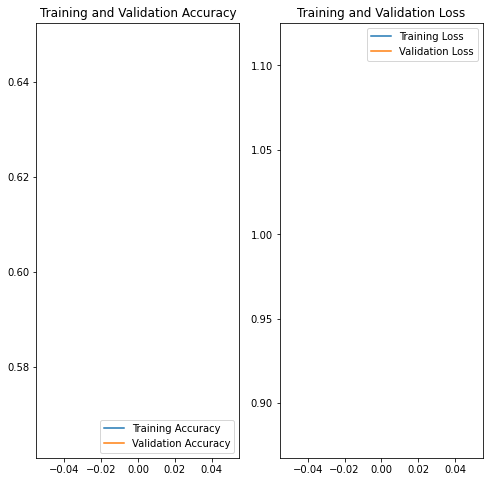

In [37]:
viz(history.history)

O modelo é overfitting porque a precisão do teste não está tão alinhada com o precisão de treinamento

# **Augmentation com camadas de pré-processamento**

In [38]:
from tensorflow.keras import layers
data_augmentation = tf.keras.Sequential(
 [
 layers.experimental.preprocessing.RandomFlip('horizontal'),
 layers.experimental.preprocessing.RandomRotation(0.1),
 layers.experimental.preprocessing.RandomZoom(0.1),
 ]
)

*Optamos por usar essas camadas com base na experimentação de tentativa e erro. Sinta-se livre para experimente com outras camadas.*

# **Construir o modelo**

Claro e seminal:

In [40]:
tf.keras.backend.clear_session()
np.random.seed(0)
tf.random.set_seed(0)

**Modelo com camada de aumento**

In [41]:
cat_dog_layers = Sequential([
 data_augmentation,
 Conv2D(32, (3, 3), activation = 'relu',
 input_shape=in_shape, strides=1,
 kernel_regularizer='l1_l2'),
 MaxPooling2D(2, 2),
 Conv2D(64, (3, 3), activation='relu'),
 MaxPooling2D(2, 2),
  Conv2D(128, (3, 3), activation='relu'),
 MaxPooling2D(2),
 Conv2D(128, (3, 3), activation='relu'),
 MaxPooling2D(2, 2),
 Flatten(),
 Dense(512, activation='relu'),
 Dense(num_classes, activation='sigmoid')
])

**Compilar e treinar o modelo**

Compile:

In [45]:
cat_dog_layers.compile(
 optimizer='adam',
 loss=tf.keras.losses.SparseCategoricalCrossentropy(
 from_logits=True),
 metrics=['accuracy'])


Train:

In [46]:

epochs = 10
history = cat_dog_layers.fit(
 train_batches, epochs=epochs, verbose=1,
 validation_data=validation_batches)

94/94 [==============================] - 634s 7s/step - loss: 1.0944 - accuracy: 0.5756 - val_loss: 0.8694 - val_accuracy: 0.6324


**Avalie o modelo para generalização**

*Avalie:*

In [47]:
metrics = cat_dog_layers.evaluate(test_batches)

12/12 [==============================] - 21s 2s/step - loss: 0.8626 - accuracy: 0.6389


**Fonte:** *State-of-the-Art Deep
Learning Models in
TensorFlow
Modern Machine Learning
in the Google Colab Ecosystem - David Paper* - 2021